# Store Order Business Analysis

This dataset consist of orders of XYZ company of USA. You need to submit Analysis Report along with your suggestions
to make the company more profitable on the basis of your Analysis. The analysis and reporting should be done as to be
reported to the CEO of the company.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
url = 'https://raw.githubusercontent.com/bkget/DS-with-AI-in-Python/cf35570d3ab6595ab73e6ac37641b98a60fa993c/Store%20Orders%20-%20Business%20Analysis/data/store-orders.xlsx'
df = pd.read_excel(url)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Analysis

In [6]:
df.shape

(9994, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [9]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## Data Insights - Analytics

In [12]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9994 non-null   int64         
 1   Order ID           9994 non-null   object        
 2   Order Date         9994 non-null   datetime64[ns]
 3   Ship Date          9994 non-null   datetime64[ns]
 4   Ship Mode          9994 non-null   object        
 5   Customer ID        9994 non-null   object        
 6   Customer Name      9994 non-null   object        
 7   Segment            9994 non-null   object        
 8   Country            9994 non-null   object        
 9   City               9994 non-null   object        
 10  State              9994 non-null   object        
 11  Postal Code        9994 non-null   int64         
 12  Region             9994 non-null   object        
 13  Product ID         9994 non-null   object        
 14  Category

In [15]:
df.describe(include='datetime')

,Order Date,Ship Date
count,9994,9994
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912
min,2014-01-03 00:00:00,2014-01-07 00:00:00
25%,2015-05-23 00:00:00,2015-05-27 00:00:00
50%,2016-06-26 00:00:00,2016-06-29 00:00:00
75%,2017-05-14 00:00:00,2017-05-18 00:00:00
max,2017-12-30 00:00:00,2018-01-05 00:00:00


### Single Column Analysis

In [16]:
def plot_barh(df, column):
    profit_sum_by_column = df.groupby(column)['Profit'].sum()
    ax = profit_sum_by_column.plot(kind='barh')
    ax.bar_label(ax.containers[0])
    plt.title(f"Total Profit by {column}")
    plt.xlabel("Total Profit")
    plt.show()

def plot_line(df, column):
    profit_sum_by_column = df.groupby(column)['Profit'].sum()
    ax = profit_sum_by_column.plot(kind='line')
    plt.title(f"Total Profit by {column}")
    plt.xlabel("Total Profit")
    plt.show()

def plot_pie(df, column):
    profit_sum_by_column = df.groupby(column)['Profit'].sum()
    labels = [f'{label}: ${value:,.2f}' for label, value in profit_sum_by_column.items()]
    profit_sum_by_column.plot(kind='pie', autopct='%1.2f%%', startangle=90, legend=False, labels=labels)
    plt.title(f"Total Profit by {column}")
    plt.ylabel('')
    plt.show()

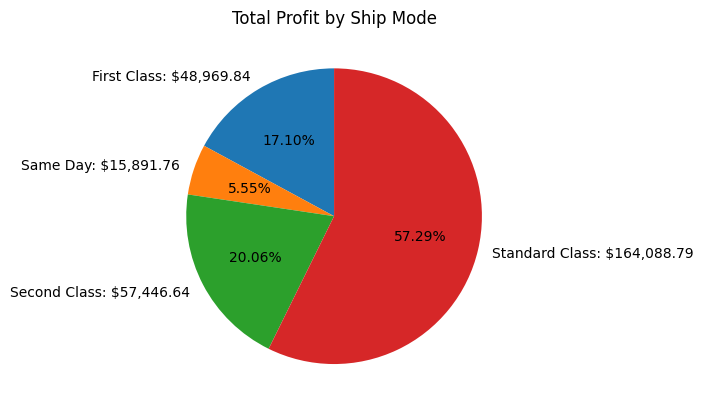

In [17]:
plot_pie(df, 'Ship Mode')

The `Standard Class` shipment mode is more profitable than other modes followed by Second and First class modes.

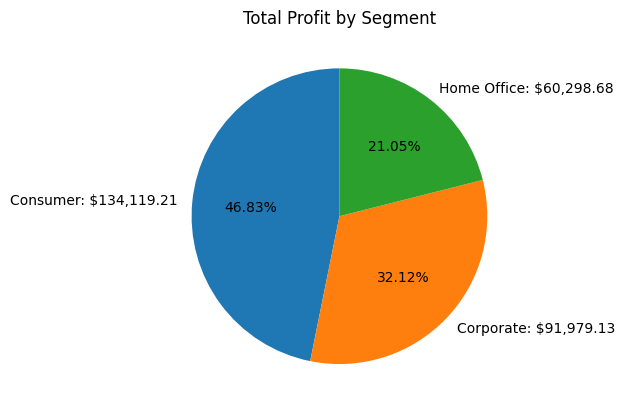

In [18]:
plot_pie(df, 'Segment')

Consumer segment total profit is the highest one followed by corporates. Home office segment is the least among the three.

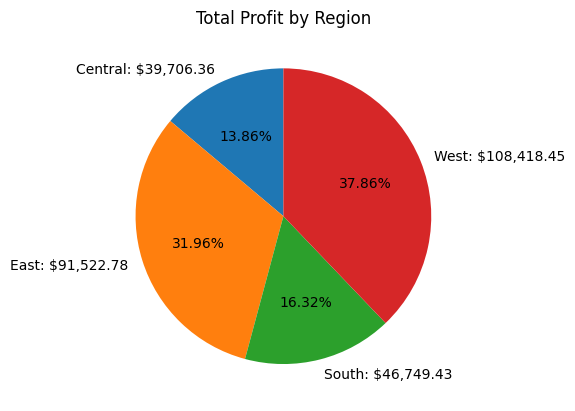

In [19]:
plot_pie(df, 'Region')

West and East regions are the most profitable regions followed by South and Central.

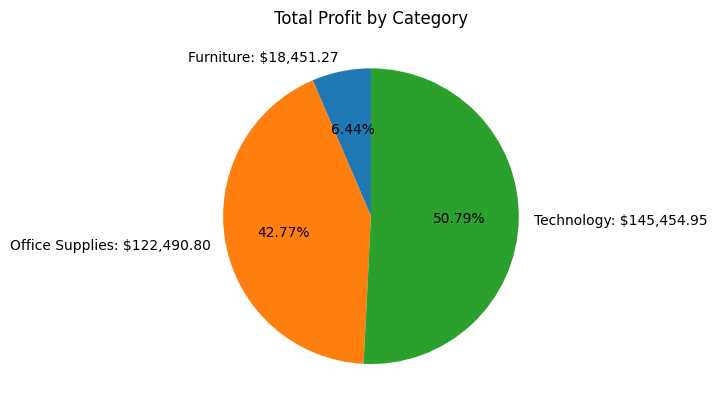

In [20]:
plot_pie(df, 'Category')

Technology category is the highest profitable category and Office Suppliers category is the closest to Technology category.

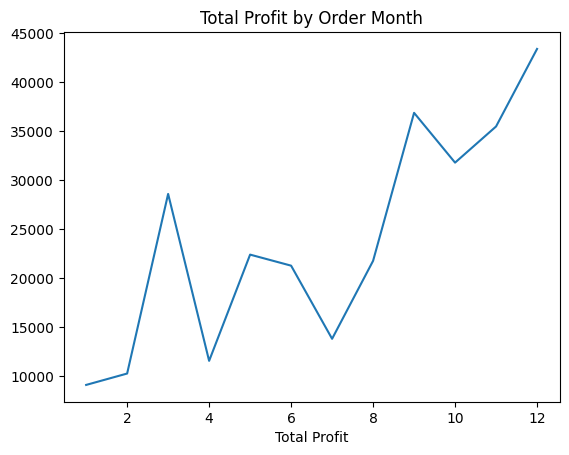

In [21]:
plot_line(df, 'Order Month')


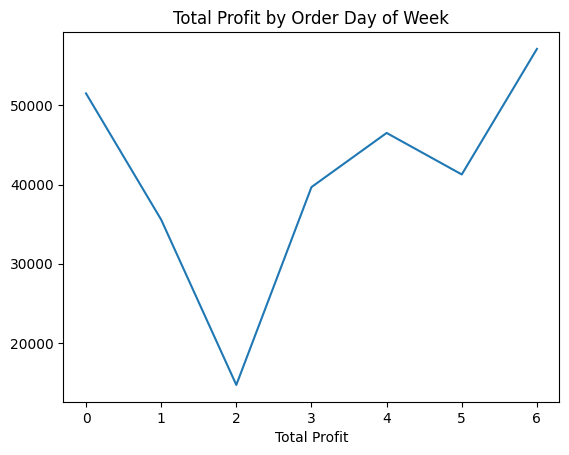

In [22]:
plot_line(df, 'Order Day of Week')

Sunday and Saterday are the most profitable days.

### Multiple Columns Analysis

In [35]:
def plot_barh_profit(df, columns):
    grouped_profit = df.groupby(columns)['Profit'].agg('sum')
    profit_by_group = grouped_profit.unstack(fill_value=0)
    profit_by_group.plot(kind='barh')
    plt.xlabel("Total Profit")
    plt.show()

def plot_barh_sales_profit(df, column):
    grouped_profit = df.groupby(column).agg({'Sales': 'sum', 'Profit': 'sum'})
    agrouped_profit = df.groupby(column).agg({'Sales': 'sum', 'Profit': 'sum'})
    ax = grouped_profit.plot(kind='bar', figsize=(10, 6))

    # Format the labels with comma separators and decimal places
    sales_labels = [f'{value:,.2f}' for value in grouped_profit['Sales']]
    profit_labels = [f'{value:,.2f}' for value in grouped_profit['Profit']]

    # Add formatted value labels directly to the bars
    ax.bar_label(ax.containers[0], labels=sales_labels, label_type='edge', padding=3)
    ax.bar_label(ax.containers[1], labels=profit_labels, label_type='edge', padding=3)

    # Add labels and title
    plt.xlabel("Total Value")
    plt.title(f"Sales and Profit by {column}")
    plt.show()

# data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

def plot_line_multiple_columns(df, columns):
    grouped_profit = df.groupby(columns)['Profit'].agg('sum')
    profit_by_group = grouped_profit.unstack(fill_value=0)
    profit_by_group.plot(kind='line')
    plt.xlabel("Total Profit")
    plt.show()

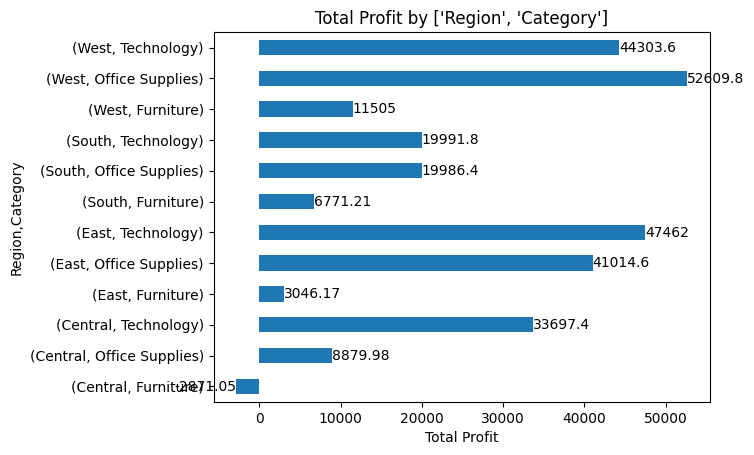

In [24]:
plot_barh(df, ['Region', 'Category'])

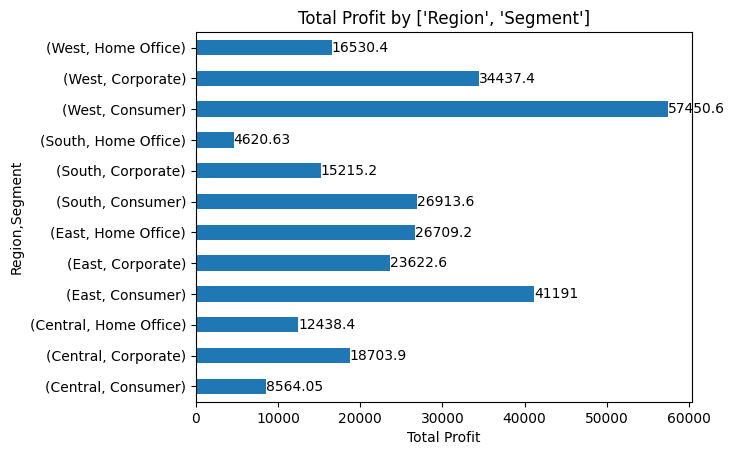

In [25]:
plot_barh(df, ['Region', 'Segment'])

In [26]:
result = df.groupby('Segment')[['Sales', 'Profit']].sum()
pd.set_option('display.float_format', '{:,.2f}'.format)
result

,Sales,Profit
Segment,,
Consumer,"1,161,401.34","134,119.21"
Corporate,"706,146.37","91,979.13"
Home Office,"429,653.15","60,298.68"


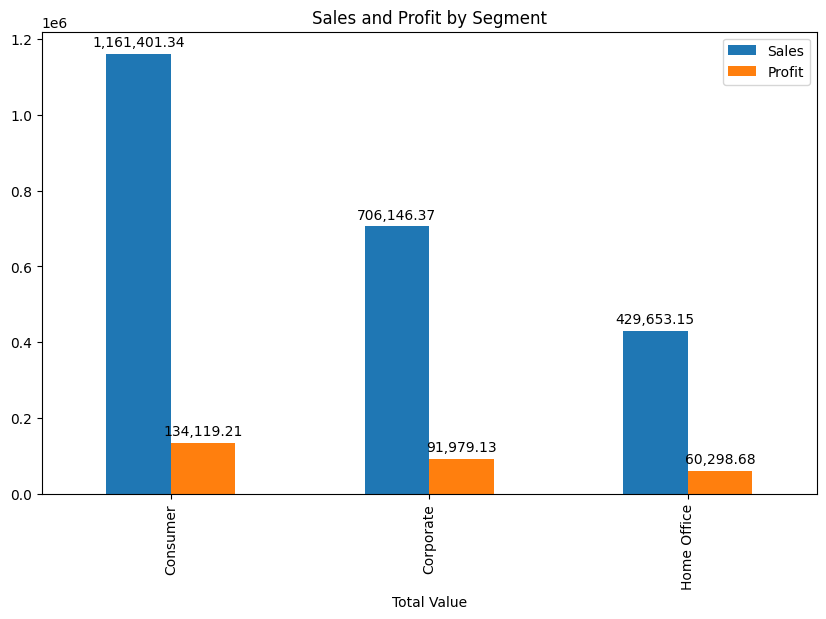

In [36]:
plot_barh_sales_profit(df, 'Segment')

In [28]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']]

,Segment,Sales_to_Profit_Ratio
0,Consumer,8.66
1,Corporate,7.68
2,Home Office,7.13


In [43]:
def lineplot_monthly(data, parameter, hue=None, palette='Set2'):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Order Month', y=parameter, hue=hue, marker='o', palette=palette)
    plt.title(f'Monthly {parameter} Trend')
    plt.xlabel('Month')
    plt.ylabel(parameter)
    plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if hue:
        plt.legend(title='Year', loc='best')
    plt.grid(True)

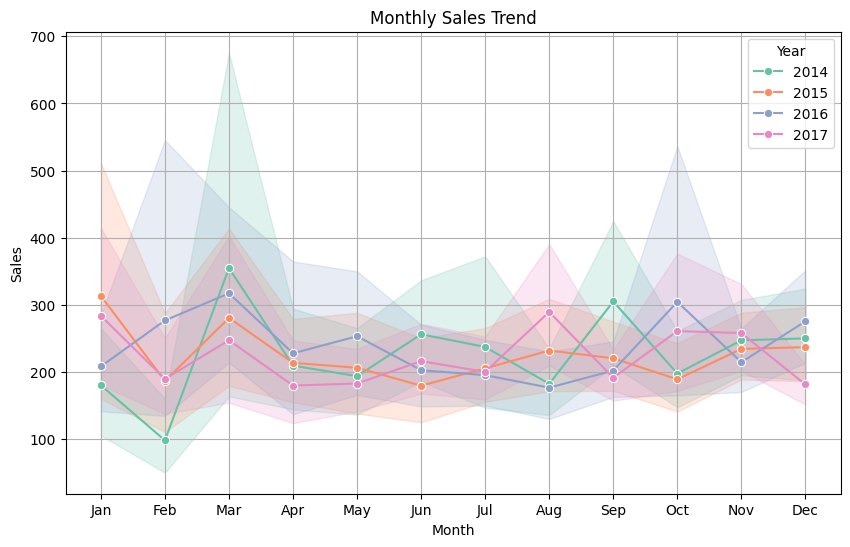

In [41]:
lineplot_monthly(df, 'Sales', hue='Order Year')

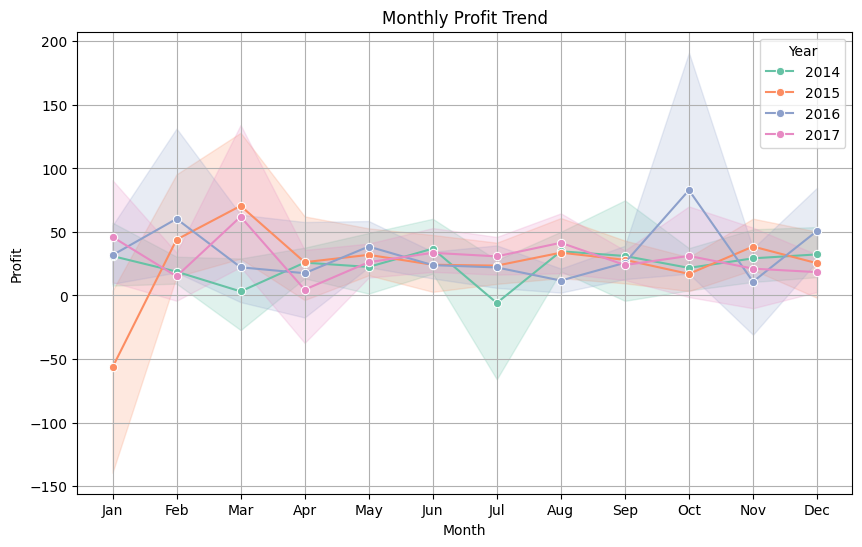

In [45]:
lineplot_monthly(df, 'Profit', hue='Order Year')

<ipython-input-43-71381e71c78e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='Order Month', y=parameter, hue=hue, marker='o', palette=palette)


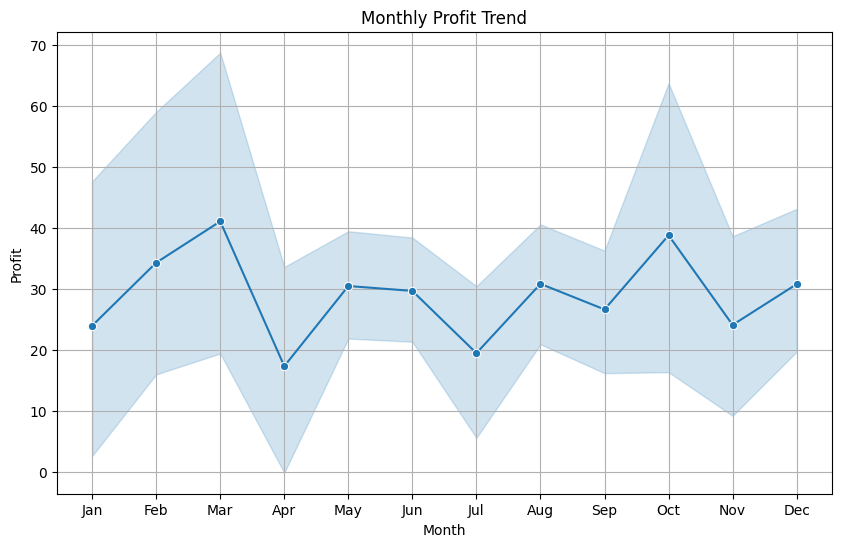

In [44]:
lineplot_monthly(df, 'Profit')

### Conclusion

- The `Standard Class` shipment mode is the most profitable, followed by `Second Class` and `First Class` modes. The `Same Day` shipment mode is the least profitable.
- The `Consumer` segment has the highest total profit, with a profit share of 47%, followed by `Corporates` with a 32% profit share. The `Home Office` segment is the least profitable, with only 21% of the profit share.
- The `West` and `East` regions are the most profitable, followed by `South` and `Central` regions.
- The `Technology` category leads with the highest profit share of 51%, followed by the `Office Supplies` category with a 43% share. The `Furniture` category is the least profitable, contributing only 6% of the profit.
- The profit trend shows an increase in `February` and `March` (with March taking the lead), as well as in `October`, compared to other months of the year. `April`, `July`, and `November` are the least profitable months, while `January`, `September`, `November`, and `December` are relatively average.
- In `2014`, sales were highest in `March`, but the profit was not as high as the sales figures. Profit remained consistent in `January`, `June`, `August`, `September`, `November`, and `December`.
- In `2015`, sales were highest in `January` and `March`. However, the profit for `January` was the worst, while `March` saw the highest profit.
- In `2016`, sales were highest in `February`, `March`, and `October`, with `February` and `October` having the highest profits. `November` and `August` had the lowest profits.
- In `2017`, sales were highest in `January` and `August`. The `March` and `January` profits were the highest, while `April`, `February`, and `December` had the lowest profits.
